# POLYNONIMIAL REGRESSION



Linear regression is all about a linear data, but what if the data is non linear?

We try to put in a best fit line when the data is linear, but if the data is non linear adding a best fit line in any direction won't give correct predictions.
This is a drawback of linear regression and we get to study the concept of polynomial regression.



---



---



 So, basically polynomial regression is a form of linear regression in which we find the same coefficients as linear regression but at the same time we add polynomial terms to the data.



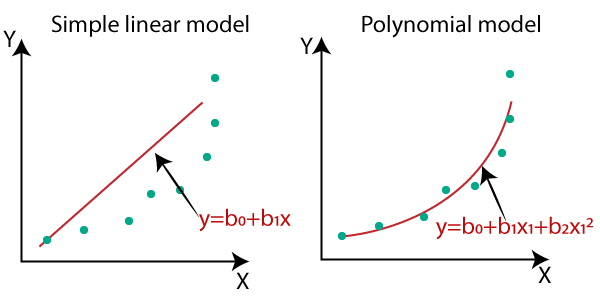

## How does it work?

suppose we had input x=35 and output y=100. The degree of the polynomial is 2 so we will have  x^0, x^1, x^2.


so now we will have x^0=1 , x^1= 35 , x^2 =1225 , y=100. we can see the shape changed from (1,2) to (1,4) and we calculate this for every row likewise. The new data that will be generated of shape (1,4) we will train it in our model.


the polynomial features such as x^2 over here, actually try to extract a polynomial relationship in the data.


then the formula for polynomial regression becomes Y= β0 + β1x1 + β2x1^2 for polynomial regression.

**How do you select the degree of the polynomial?**

**problem statement:** 
The degree of a polynomial is a hyperparameter, if we set the degree to low it is a possibility that the graph would underfit on the other hand if we will set it too high, it will try to touch every point of data on the graph and overfitting takes place.



So to avoid these we need a optimum value to set the degree which lies in between.


suppose, we had x1, x2 as input so we get Y=β0 + β1x1 + β2x1^2 + β3x2 + β4x2^2
and we keep doing this if we have multiple input values. In all, the degree is decided from the number of input values.

# example code for polynomial regression

Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline


Generating a dataset

In [ ]:
x = 6* np.random.rand(200,1) - 3
y = 0.8 * x**2 + 0.9 * x + 2 + np.random.randn(200,1)

# y=0.8x^2 + 0.9x + 2 
# generated this polynomial equation of degree 2 with some random noise so that there would be a random distribution of points.


The task of my model is to find these coefficients of x i.e 0.8 and 0.9


y=0.8x^2 + 0.9x + 2 

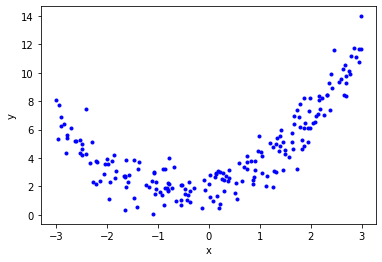

In [ ]:
plt.plot(x,y, 'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Training and Splitting the data

In [ ]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=3)

In [ ]:
#applying linear regression
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)
r2_score(x_test,y_pred)

-6.0756671515156775

**Inference:**
the r2_score is negative meaning it is too bad, which means the model will not be able to make accurate predictions
because the data is polynomial and we tried to fit a linear best fit line.

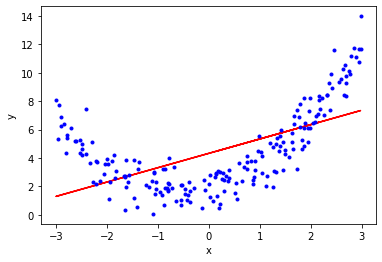

In [ ]:
plt.plot(x_train, lr.predict(x_train), color = 'r')
plt.plot(x,y,'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#applying polynomial linear regression
#degree 2
poly = PolynomialFeatures(degree=2)   #till power 2

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

In [ ]:
print(x_train[0])            #original
print(x_train_trans[0])


[0.16985682]
[1.         0.16985682 0.02885134]


**Inference:**


[2.76761433] this is original

1 is x^0 

2.76761433 is x^1

7.65968907 is x^2

In [ ]:
#include_bias parameter: this parameter removes x^0 if it is false, but bydefault it is True then it would show x^0
poly = PolynomialFeatures(degree=2, include_bias =True)  

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)


In [ ]:
print(x_train[0])            #original
print(x_train_trans[0])

[0.16985682]
[1.         0.16985682 0.02885134]


In [ ]:
lr = LinearRegression()
lr.fit(x_train_trans,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test_trans)

In [ ]:
r2_score(y_test,y_pred)

0.8338865471141972

**Inference:** This is a good r2_score as compared to the previous ones.

In [ ]:
#coefficients and intercept

print(lr.coef_)
print(lr.intercept_)

[[0.         0.89087501 0.82138921]]
[1.85130637]


## Polynomial best fit line

In [ ]:
x_new= np.linspace(-3,3,200).reshape(200,1)
x_new_poly= poly.transform(x_new)
y_new= lr.predict(x_new_poly)

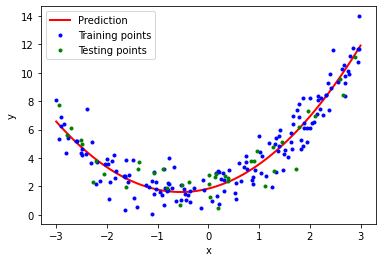

In [ ]:
plt.plot(x_new,y_new,'r-',linewidth=2,label='Prediction')
plt.plot(x_train,y_train,'b.',label='Training points')
plt.plot(x_test,y_test,'g.',label='Testing points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Multiple Polynomial Linear Regression

In [ ]:
#3D polynomial regression
x= 7*np.random.rand(100,1) - 2.8
y= 7*np.random.rand(100,1) - 2.8

z= x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 +np.random.randn(100,1)
# z=x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

## Generating a Hyperplane

In [ ]:
lr= LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(),x.max(),10)
y_input = np.linspace(y.min(),y.max(),10)
xGrid, yGrid = np.meshgrid(x_input, y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [ ]:
import plotly.graph_objects as go 

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z = z_final))

fig.show()

## Bias Variance TradeOff

The bias–variance tradeoff is the property of a model that the variance of the parameter estimated across samples can be reduced by increasing the bias in the estimated parameters.

**Bias**: the inability of the machine learning model to truly capture the relationship in the training data. In simple words, a high biased model has very poor predictions on the data.

A good model has low bias.

**Variance**: The difference of fits on various datasets.

suppose, if the error on the training data is 10 and the error on the test data is 100, then the variance is 90. So, this is high variance or too much variability.


An important point is, a model that has low bias that put all its effort to cover all points in the training data, but due to that the error in the test data increased, so that resulted in high variance in the data. (case of overfitting)



1.   **Overfitting**: The model works good with the training data but not with the test data or in other words the training error is low but the test error is high and so the difference is very high between the two error. This is overfitting. 

2.   **Underfitting:** The model works poorly on the both, the test as well as the training data. Basically this has high bais and low variance.


So, a good model should have **LOW BIAS and LOW VARIANCE**.

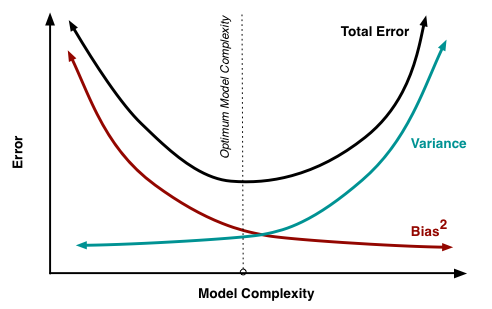

To create a model that has low bias and low variance, three techniques can be used:


1.   Regularisation
2.   Bagging 
3.   Boosting

